# "Chill Havana" Project
### Análisis de Bares y Restaurantes en La Habana

Un día como cualquiera salía un grupo de jóvenes de su escuela con ganas de pasar un rato chill con los colegas, algo para picar y una musiquita de fondo. Ya todos habían dado el sí cuando alguien soltó la misma pregunta de siempre: Loco, ¿pero a dónde vamos? Nada, que esa era la pregunta que casi siempre cortaba todo el rollo. Buscar el sitio ideal para las vibes del momento era bastante complicado, en ningún sitio ponían toda la info necesaria. 

-"Tú busca en MenúCuba, ella en Instagram y yo la dirección en Maps, y ojalá salga todo!"

¿Nunca has sentido tremendo agobio de escoger a qué lugar salir? Pues ellos sí y decidieron que era la última vez. ¿Qué es lo más importante para ti a la hora de elegir? ¿La variedad del menú? ¿Un plato específico? ¿La ubicación? ¿La valoración de otras personas? 
Nada, que tú puedes elegir lo que quieras porque para eso aquella tarde nació el proyecto "Chill Havana".

Al final, después de tanto debate, ese día no salieron, se quedaron pensando y organizando sus ideas. Sí, sí, ellos se tomaron el problema como algo personal, pero tranqui, tenían su arma secreta: el amiguito del grupo que le sabía a la tecnología. Estaba clarísimo, querían hacer una página web que tuviera datos sobre más de 200 bares y restaurantes de La Habana para que cualquiera que quisiera elegir un lugar pudiera encontrar allí todo lo necesario para decidirse por el más adecuado para la ocasión.
Oye, que el proyecto era tremenda idea eh. ¿Cómo crees que cambiaría las cosas tener un sitio web tan guay?

In [68]:
#Crear el dataframe con los json para el trabajo con las bibliotecas de Python
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import folium
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def crear_data_frame():
    ruta = "C:/Users/andre/Desktop/Chill_Havana_Project/Jsons"
    data = []
    for archivo in glob.glob(ruta + "/*.json"):
        with open(archivo, 'r', encoding='utf-8') as f:
            contenido = json.load(f)
            data.append(contenido)
            
    df = pd.DataFrame(data)
    return df

df = crear_data_frame()
#print(df['name'])

El grupo seleccionó tres municipios cabecera por ser los más frecuentados por ellos y por muchos habaneros: Plaza de la Revolución, Playa y Centro Habana, de estos tres analizaron 30 establecimientos y del resto solo 10, pero antes de lanzarse a la creación de su página web, se dieron cuenta de que había una pregunta crucial que necesitaban responder: ¿Qué tipo de establecimiento predominaba más en La Habana: bar, restaurante o bar-restaurante? 
Un día, mientras revisaban las respuestas, uno de los chicos del grupo se dio cuenta de algo. -"¡Espera! Entre los sitios de los cuales tenemos información hay más restaurantes que los otros dos tipos, podríamos enfocar nuestro proyecto en destacar los mejores lugares para comer."
Fue entonces cuando se dieron cuenta de que no solo querían crear una página web; querían entender el sistema gastronómico de La Habana.

In [8]:
# Contar los tipos de establecimientos
tipo_establecimientos = df['type_of_establishment'].value_counts().reset_index()
tipo_establecimientos.columns = ['Tipo de Establecimiento', 'Cantidad']

fig = px.pie(tipo_establecimientos, 
            values='Cantidad', 
            names='Tipo de Establecimiento', 
            title='Porcentaje de Tipos de Establecimientos en La Habana',
            hole=0.1)
fig.show()

Mientras trabajaban en ello, Ana, la más tranquila, tuvo una idea. -"¿Y si en lugar de poner las direcciones de los lugares, incluimos un mapa interactivo con las ubicaciones exactas?".
Todos hemos tenido experiencias frustrantes tratando de encontrar lugares solo con direcciones, puesto que muchas veces no son calles de nuestro conocimiento, por lo que tener una web con los establecimientos perfectamente localizados hace más fácil ubicarse y visualizar sus puntos de referencia cercanos al destino deseado. ¿Quién sabe? Quizás después se te antoja un heladito o sentarte en el malecón."

In [9]:
mapa = folium.Map(location=[23.1136, -82.3666], zoom_start=12)  # Coordenadas de La Habana

for index, row in df.iterrows():
    latitude = row['coordinates']['latitude']
    longitude = row['coordinates']['longitude']
    name = row['name']
    
    folium.Marker(
        location=[latitude, longitude],
        popup=name,
        icon=folium.Icon(color='darkblue')
    ).add_to(mapa)

mapa


Otro aspecto que también consideraron relevante fue el análisis de la cantidad de establecimientos que poseían capacidad "baja", "media" o "alta". 

-"Esto podría influir mucho en cómo la gente elige salir. Si un lugar tiene mucha capacidad, puede ser ideal para grupos grandes, mientras que uno con capacidad baja puede ser más acogedor y tranquilo para determinados encuentros." -habló Paolo con total seguridad.

¿Cuál será la capacidad más frecuente de los bares y restaurantes en La Habana? ¿Y si además se toman en cuenta dichas clasificaciones por cada municipio?

In [10]:
capacidades = ["alta", "media", "baja"]
df1 = df[df['intake_capacity'].isin(capacidades)]
conteo_intake_capacity = df1['intake_capacity'].value_counts().reset_index()
conteo_intake_capacity.columns = ['Capacidad de Recepción', 'Cantidad']

fig = px.pie(conteo_intake_capacity, 
            names='Capacidad de Recepción', 
            values='Cantidad', 
            title='Distribución de Establecimientos por Capacidad de Recepción',
            color='Capacidad de Recepción',
            color_discrete_sequence=px.colors.sequential.Plasma)
fig.show()

In [11]:
conteo_por_municipio = df.groupby(['district', 'intake_capacity']).size().reset_index(name='count') #Agrupa por tipo de capacidad y el municipio y cuenta. El (name='count') le da nombre a la nueva columa con los conteos.

fig = px.bar(conteo_por_municipio, 
            x='district', 
            y='count', 
            color='intake_capacity', 
            barmode='group',
            title='Cantidad de Establecimientos por Municipio y Capacidad',
            labels={'district': 'Municipio', 'count': 'Número de Establecimientos'},
            text='count')
fig.show()

-"Oye, cuando ustedes tienen en mente ir a algún sitio ¿no les da automáticamente el impulso de buscarlo en redes sociales como Instagram y Facebook? Ahí suben fotos del local, de los platos y más o menos vas teniendo una idea. Para mí, que tenga actividad en las plataformas digitales, es muy buena señal. Hay que modernizarse." -intervino nuevamente Ana.

-"Totalmente de acuerdo, hoy en día todos comparten foto de su comida o del lugar en el que están, incluso muchos de los nuevos lugares se dan a conocer por su actividad en plataformas digitales. Si un lugar tiene una buena presencia en redes probablemente atraerá más clientes." -comentó Luis.

Con esta nueva idea, decidieron investigar qué municipios tenían la mayor cantidad de establecimientos activos en redes sociales, descubriendo así que en los municipios Playa y Plaza, 21 de los 30 sitios analizados en cada uno de ellos respectivamente, tenían perfiles en las plataformas, con muchas más posibilidades de llegar al cliente.


In [4]:
#Ver la cantidad de establecimientos por municipio que tiene Instagram y Facebook.
def social_networks(contact):
    return bool(contact.get('instagram')) and bool(contact.get('facebook'))

df['has_social_net'] = df['contact'].apply(social_networks)

df_social_net = df[df['has_social_net']]

mun_count = df_social_net['district'].value_counts().reset_index()
mun_count.columns = ['Municipio', 'Cantidad']

fig = px.bar(mun_count, 
            x='Municipio', 
            y='Cantidad', 
            title='Cantidad de Restaurantes con Redes Sociales por Municipio',
            labels={'Cantidad': 'Cantidad de Restaurantes', 'Municipio': 'Municipio'},
            color='Cantidad',
            color_continuous_scale=px.colors.sequential.Plasma)  # Cambiado a 'Greens'

fig.update_layout(xaxis_tickangle=-45)
fig.show()

Mientras reflexionaban sobre la importancia de las redes sociales para los establecimientos notaron que estas no solo servían como plataformas para promocionar sus negocios, sino que también permitían a los clientes interactuar directamente dejando comentarios y reseñas de ayuda para otros.

Por eso se propusieron utilizar precisamente el rating de los establicimientos basados en las reseñas hechas en TripAdvisor para comparar entre 'restaurante', 'bar - restaurante' y 'bar' cuál tenía mejor valoración por parte de los clientes.

In [10]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

tipos = ['bar', 'bar - restaurante', 'restaurante']

promedios = {}
for tipo in tipos_deseados:
    promedio = df[df['type_of_establishment'] == tipo]['rating'].mean()
    promedios[tipo] = round(promedio, 2)

df_promedios = pd.DataFrame(list(promedios.items()), columns=['Tipo de Establecimiento', 'Rating Promedio'])

fig = px.bar(df_promedios, 
            x='Tipo de Establecimiento', 
            y='Rating Promedio', 
            color='Rating Promedio',
            title='Rating Promedio por Tipo de Establecimiento',
            labels={'Tipo de Establecimiento': 'Tipo', 'Rating Promedio': 'Rating Promedio'},
            color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

EL hecho de que algo le guste a muchas personas no implica necesariamente que te vaya a gustar a tí, pero tener referencias nunca está de más, se decidió además analizar el rating desde otra perspectiva para determinar cuáles eran los 20 mejores valorados y los 20 peores.

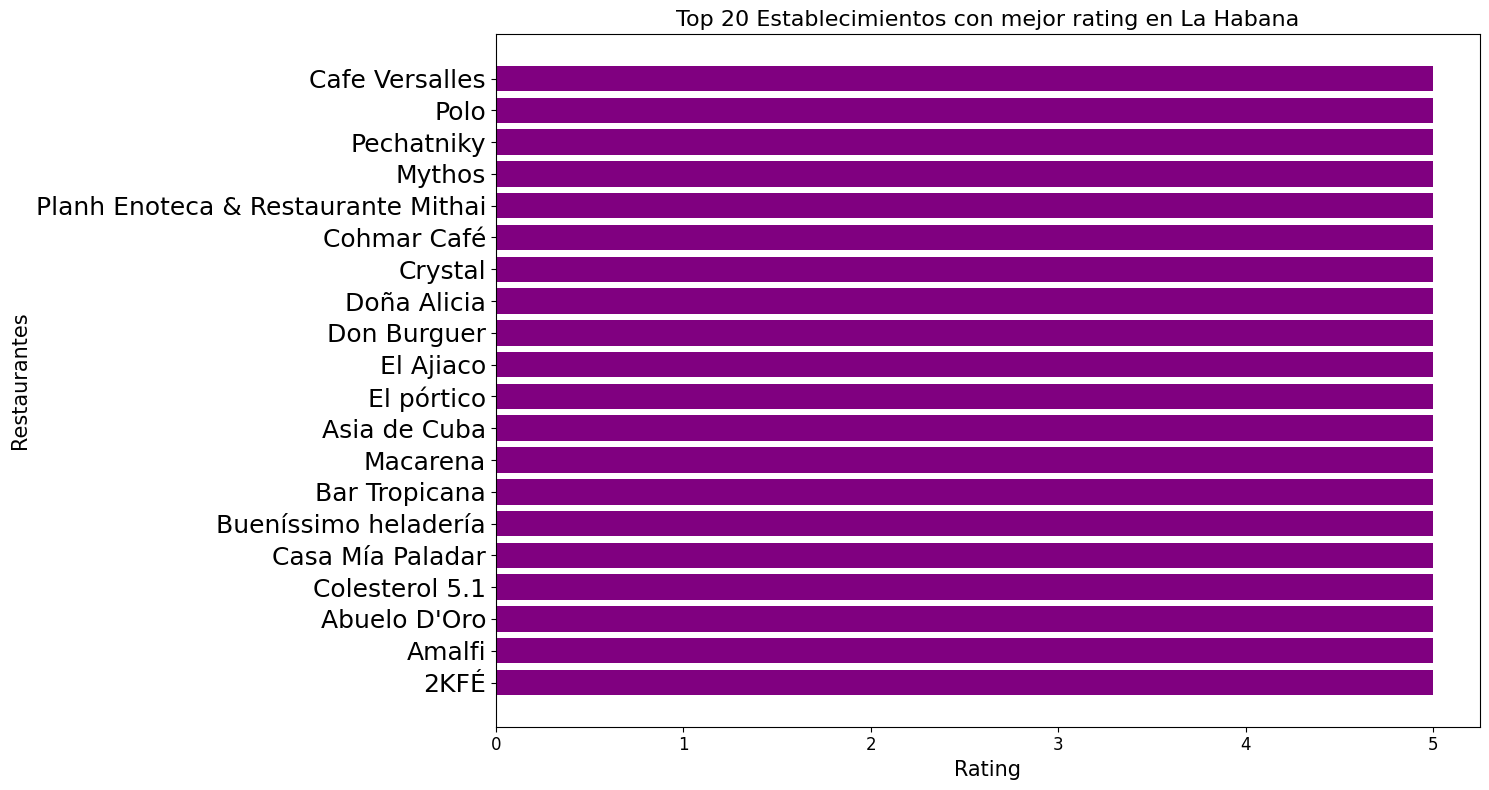

In [5]:
df_copy = df.copy() # Crea una copia del df
df_copy['rating'].fillna(0, inplace=True)  # Alternativa más segura
#df[df["rating"].isna()]=0 #Hace cero los que tiene un rating "null"
df_valid_ratings = df_copy.sort_values(by='rating', ascending=False).head(20) #Ordena de mayor a menor y solo deja los 20 mejores

plt.figure(figsize=(15, 8))
plt.barh(df_valid_ratings['name'], df_valid_ratings['rating'], color='purple')
plt.title('Top 20 Establecimientos con mejor rating en La Habana', fontsize=16)
plt.xlabel('Rating', fontsize=15)
plt.ylabel('Restaurantes', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

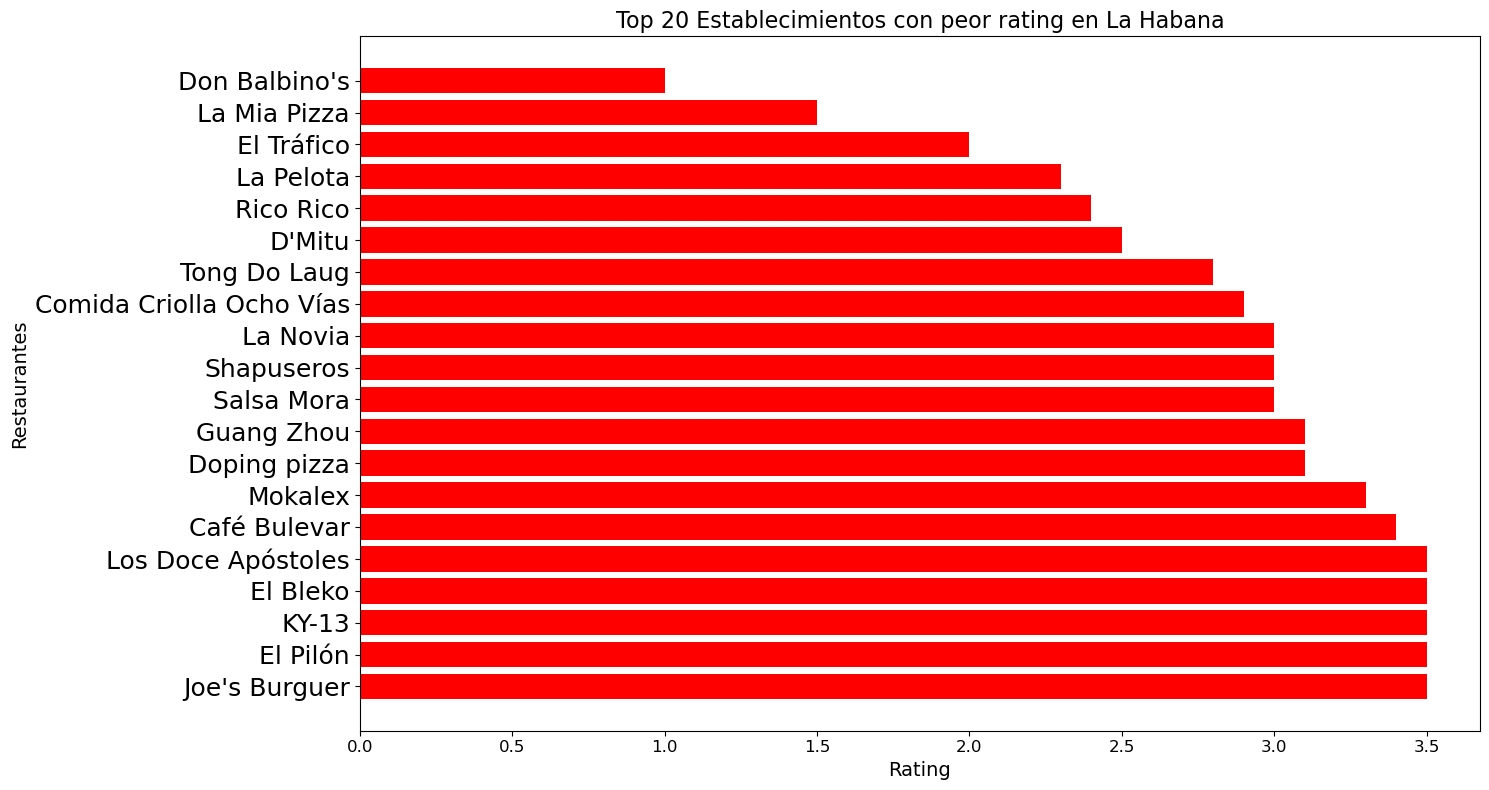

In [14]:
df_sorted_values = df.sort_values(by='rating', ascending=False).tail(51) #Ordena de mayor a menor y escoge las ultimas 51 lineas.
veinte_peores = df_sorted_values.iloc[:20,:] #Se queda con las 20 primeras, las otras 31 son 0.

plt.figure(figsize=(15, 8)) 
plt.barh(veinte_peores['name'], veinte_peores['rating'], color='red')
plt.title('Top 20 Establecimientos con peor rating en La Habana', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Restaurantes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.tight_layout() 
plt.show()

-"Saber los mejores y peores está bien, así lo puedes tener en cuenta para cada ocasión, pero ¿no crees que siempre es necesario conocer el punto medio? Muchas veces, un sitio con un rating medio puede tener reseñas mixtas. Algunos clientes pueden haber tenido una experiencia positiva, mientras que otros pueden haber encontrado fallos.-expresó Laura, animándose a opinar". 
-"Además, podríamos crear una sección en nuestra web donde destacamos estos lugares. Esto no solo beneficiaría a los restaurantes, sino que también proporcionaría a nuestros usuarios opciones más variadas."

¿Cuáles serán de esos lugares aquellos que tienen una calificación aceptable?
Para ello el grupo comenzó a analizar datos sobre restaurantes con ratings entre 3.0 y 4.0.


In [15]:
df[df["rating"].isna()]=0 #Hace cero los que tiene un rating "null"
df_valid_ratings_to_median = df.sort_values(by='rating', ascending=False) #Ordena los rating de mayor a menor
a = df_valid_ratings_to_median.iloc[:-31,:] #Quita los ultimos 31, son los de rating "null" que hicimos 0.
most_access = a[(a['rating'] >= 3.0) & (a['rating'] <= 4.0)].copy(deep = True) #Deja solo los que tengan rating dentro del intervalo indicado
#print(most_access)
fig = px.bar(most_access, 
            x='name', 
            y='rating', 
            title='Establecimientos con Rating entre 3.0 y 4.0',
            labels={'name': 'Nombres de los establecimientos', 'rating': 'Rating'},
            color='rating',
            color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(xaxis_tickangle=-70) 
fig.show()

¿Eres más de comida tradicional o te gusta probar cosas nuevas todo el rato? Se sabe que la mayoría de los establecimientos ofrece comida criolla, cubana, pero después de esa ¿cuál es el tipo de comida que se oferta en mayor cantidad sitios?
Era un martes en la tarde y los chicos se habían reunido para hacer lluvia de ideas cuando surgió esa duda. 

— No sé, yo prefiero lo tradicional. No hay nada como una buena una ropa vieja. La comida cubana tiene tanto sabor e historia. -afirmó Luis. 

— Pero piensa en todas las opciones que hay ahora. La Habana no solo tiene comida criolla y cubana; hay influencias de la cocina internacional que están empezando a aparecer en los menús.-lo corrigieron

— Ambas tienen lo suyo, en todo caso nuestra labor no es tomar partido, sino reflejar la verdad para que el usuario sea libre de eligir por sí mismo. A simple vista he podido notar que la mayoría sigue ofreciendo comida cubana tradicional como lechón asado y yuca con mojo, pero también hay una gran influencia de otros tipos de comidas. -intervino Ana de forma imparcial. 

In [76]:
cocina = df['cuisine'].explode()  # Separa cada elemento de las listas

conteo_cocina = cocina.value_counts().reset_index()
conteo_cocina.columns = ['Tipo de Cocina', 'Cantidad']

fig = px.bar(conteo_cocina, 
            x='Tipo de Cocina', 
            y='Cantidad', 
            title='Cantidad de Establecimientos por Tipo de Cocina',
            labels={'Cantidad': 'Cantidad de Establecimientos', 'Tipo de Cocina': 'Tipo de Cocina'},
            color='Cantidad',
            color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(xaxis_tickangle=-45) # Rotar las etiquetas de x

fig.show()

—Yo sabía que Italia iba a salir por algún lado. ¡La cocina italiana se ha vuelto casi tan cubana como el congrí!-dijo Paolo en un tono divertido. Pero espera, ¿comida libanesa? ¿ceilanesa? ¿cajún? ¿Qué es comida cajún?  

— Jaja, esa viene del estado de Lousiana, en Estados Unidos.-intervino la enciclopedia andante del grupo.

— Pues yo no tenía idea que eso existía y mucho menos que la podíias encontrar en un restaurante de La Habana. ¿Qué lugares ofrecen esas comidas únicas? ¿Tú crees que a la gente le guste bastante ese estilo un poco más exótico?-contestó Paolo mientras daba pie a un análisis bastante interesante.

In [17]:
cocina = df['cuisine'].explode()

count_cocina = cocina.value_counts().reset_index() # Cuenta cuantas veces aparece cada tipo de cocina
count_cocina.columns = ['Tipo de Cocina', 'Cantidad']

tipos_unicos = count_cocina[count_cocina['Cantidad'] == 1]['Tipo de Cocina'] # Se queda con los q solo salen una vez

def tiene_tipo_unico(cuisine_list): # Función para ver si un lugar tiene tipos únicos
    if isinstance(cuisine_list, list):  # Ver si es una lista
        return any(tipo in tipos_unicos.values for tipo in cuisine_list) # Devuelve True si hay algun tipo de cocina unico
    return False  # Si no es una lista

restaurantes_unicos = df[df['cuisine'].apply(tiene_tipo_unico)] # Del df original se queda con los lugares con tipos únicos
restaurantes_info = restaurantes_unicos[['name', 'rating', 'cuisine']]

def obtener_tipo_unico(cuisine_list): # Crear una columna con el tipo de cocina único
    for tipo in cuisine_list:
        if tipo in tipos_unicos.values:
            return tipo
    return None

restaurantes_info['Tipo de Cocina Único'] = restaurantes_info['cuisine'].apply(obtener_tipo_unico)

fig = px.bar(restaurantes_info, 
            x='name', 
            y='rating', 
            title='Ratings de Restaurantes con Tipos de Cocina Únicos',
            labels={'rating': 'Rating', 'name': 'Nombre del Restaurante'},
            color='rating',
            color_continuous_scale=px.colors.sequential.Plasma,
            hover_data={'Tipo de Cocina Único': True})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

Mientras el grupo de amigos continuaba su trabajo en "Chill Havana", notaron que ya se habían hecho muchas preguntas pero no se había hablado de un elemento crucial: el menú de cada establecimiento. Estaban conscientes de cuan importante es tener un menú accesible en su web. 
¿Recuerdas cuántas veces has ido a un restaurante y no has encontrado eso que tanto deseabas comer, o simplemente no te interesaba ninguna de las opciones de la cartan? ¿En cuántas ocasiones te has interesado por conocer los precios de un sitio antes de ir? Es una experiencia común el poder saber todo del lugar que vas a visitar para de esa forma evitar decepciones.


Siguiendo esa idea lo primero a estudiar fue cuántos restaurantes por municipio ofrecían ofertas para la primera comida del día: desayunos. Como resultado notaron que no era común tener este tipo de ofertas en los distintos establecimientos.

In [39]:
def tiene_desayuno(menu):
    if isinstance(menu, dict): # Verificar si 'breakfasts' es un dict y contiene una lista no vacía
        if isinstance(menu.get('breakfasts'), dict) and 'items' in menu['breakfasts']:
            return len(menu['breakfasts']['items']) > 0
    return False

df['with_breakfasts'] = df['menu'].apply(tiene_desayuno) # Aplicar la función para crear una columna que indica desayuno

resultados = df[df['with_breakfasts']].groupby('district').size().reset_index(name='count')# Agrupar por distrito y contar el número de establecimientos

fig = px.bar(resultados, 
            x='district', 
            y='count', 
            color='count', 
            barmode='group',
            title='Cantidad de Establecimientos que Ofertan Desayuno por Municipio',
            labels={'district': 'Municipio', 'count': 'Número de Establecimientos'},
            color_continuous_scale=px.colors.sequential.Viridis,
            text='count')
fig.show()

Con la misma lógica analizaron qué número de lugares en cada municipio habanero contaba con ofertas especiales en su menú que podía ir desde sugerencias del chef hasta menú infantil o ejecutivo.

In [38]:
def tiene_ofertas_especiales(menu):
    if isinstance(menu, dict): # Ver si menu es un diccionario
        if isinstance(menu.get('special_offers'), list) and menu['special_offers']:#Ver si special offers es una list y no está vacía
            return True
    return False

df['with_special_offers'] = df['menu'].apply(tiene_ofertas_especiales)
resultados = df[df['with_special_offers']].groupby('district').size().reset_index(name='count')

fig = px.bar(resultados, 
            x='district', 
            y='count', 
            color='count', 
            barmode='group',
            title='Cantidad de Establecimientos con Ofertas Especiales por Municipio',
            labels={'district': 'Municipio', 'count': 'Número de Establecimientos'},
            text='count') 
fig.show()

¿Recuerdan que una de las primeras cosas que notamos es que el tipo de establecimiento más común eran los restaurantes? Estos representaban el 62.2% del total analizado. Su diferencia con un bar-restaurante es que no ofrecen una carta tan amplia de bebidas alcohólicas, sino que se enfocan más en la variedad de comida, por lo tanto sería interesante preguntarse cuántos restaurantes tienen al menos una bebida alcohólica en sus cartas. Haciendo este análisis por municipio se puede comparar como varía esta caracterítica de los restaurantes en cada uno de ellos.

In [21]:
df_restaurantes = df[df['type_of_establishment'] == 'restaurante']
def tiene_alcohol(menu):
    if isinstance(menu.get('drinks'), dict): #Ver si 'drinks' es un dict y contiene 'alcoholic' 
        alcoholic = menu['drinks'].get('alcoholic') #Ver si 'alcoholic' es una lista y tiene elementos
        if isinstance(alcoholic, list):
            return len(alcoholic) > 0  # Retorna True si hay elementos en la lista
        elif isinstance(alcoholic, bool):
            return alcoholic
    return False

df_restaurantes['with_alcohol'] = df_restaurantes['menu'].apply(tiene_alcohol)
resultados_alcohol = df_restaurantes[df_restaurantes['with_alcohol']].groupby('district').size().reset_index(name='count')

fig_alcohol = px.bar(resultados_alcohol, 
                    x='district', 
                    y='count', 
                    color='count', 
                    barmode='group',
                    title='Cantidad de Restaurantes que Ofrecen Alcohol por Municipio',
                    labels={'district': 'Municipio', 'count': 'Número de Restaurantes'},
                    text='count')
fig_alcohol.show()

Otro análisis que les pareció revelador fue ver cuál era el plato más costoso y menos costoso por municipio.

— Esto nos dará una perspectiva clara sobre la diversidad económica de la gastronomía en los distintos lugares de La Habana.-expresó Ana con entusiasmo.

— Exacto. El plato más caro puede indicar un enfoque hacia una experiencia gastronómica única, mientras que el más barato puede mostrar opciones accesibles para toda la población.-enfatizó Luis.

In [ ]:
def platillo_mas_costoso(row):
    if 'main_courses' in row['menu'] and isinstance(row['menu']['main_courses'], dict):
        items = row['menu']['main_courses'].get('items', [])
        if items:
            max_precio = -1
            platillo_costoso = None
            for item in items:
                precio_actual = item.get('price')
                if precio_actual is not None and isinstance(precio_actual, (int, float)):
                    precio_actual = float(precio_actual)  # Convertir a float
                    if (item['price'], (int, float)):
                        precio_actual = float(item['price'])
                        if precio_actual > max_precio:
                            max_precio = precio_actual
                            platillo_costoso = item['name']
            return platillo_costoso, max_precio
    return None, 0

df_copia = df.copy(deep=True)
def aplicar_funcion(df_copia):
    platillos = []
    precios = []
    for index, row in df_copia.iterrows():
        platillo, precio = platillo_mas_costoso(row)
        platillos.append(platillo)
        precios.append(precio)

    df_copia['platillo_mas_costoso'] = platillos
    df_copia['precio'] = precios

aplicar_funcion(df_copia)

resultados = df_copia.groupby('district').agg({'platillo_mas_costoso': 'first', 'precio': 'max'}).reset_index()
#print(resultados)

fig = px.bar(resultados, 
            x='district', 
            y='precio', 
            color='precio',
            text='platillo_mas_costoso',
            title='Platillos Más Costosos por Municipio',
            labels={'district': 'Municipio', 'precio': 'Precio'},
            color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

In [ ]:
def platillo_menos_costoso(row):
    if 'main_courses' in row['menu'] and isinstance(row['menu']['main_courses'], dict):
        items = row['menu']['main_courses'].get('items', [])
        if items:
            min_precio = float('inf')
            platillo_barato = None
            for item in items:
                precio_actual = item.get('price')
                if precio_actual is not None and isinstance(precio_actual, (int, float)):
                    precio_actual = float(precio_actual)  # Convertir a float
                    if (item['price'], (int, float)):
                        precio_actual = float(item['price'])
                        if precio_actual <min_precio:
                            min_precio = precio_actual
                            platillo_barato = item['name']
                return platillo_barato, min_precio
    return None, 1000000000

df_copia = df.copy(deep=True)
def aplicar_funcion(df_copia):
    platillos = []
    precios = []
    for index, row in df_copia.iterrows():
        platillo, precio = platillo_menos_costoso(row)
        platillos.append(platillo)
        precios.append(precio)

    df_copia['platillo_menos_costoso'] = platillos
    df_copia['precio'] = precios

aplicar_funcion(df_copia)

resultados = df_copia.groupby('district').agg({'platillo_menos_costoso': 'first', 'precio': 'min'}).reset_index()
#print(resultados)

fig = px.bar(resultados, 
            x='district', 
            y='precio', 
            color='precio',
            text='platillo_menos_costoso',
            title='Platillos Más Baratos por Municipio',
            labels={'district': 'Municipio', 'precio': 'Precio'},
            color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

Javier, siempre entusiasta, propuso una nueva idea.
— ¿Y si hacemos un análisis comparativo de los precios máximos y mínimos de un plato determinado en cada municipio? 

— ¡Eso sería increíble! Así podríamos mostrar a los usuarios no solo qué comer, sino también cuánto deberían esperar pagar dependiendo de su ubicación. Esto podría ayudarles a planificar mejor sus salidas.-añadió Lucía.

In [24]:
def check_price_range(aux, plato): 
    precios = []
    for i in aux:
        if i != "drinks" and i != "special_offers":
            if aux[i]:
                for j in aux[i]["items"]:
                    if (
                        j["name"].lower().strip().find(plato.lower().strip()) != -1
                    ):
                        precios.append(j["price"])
    return precios

def filter_price_range(_df, plato):
    municipios = _df['district'].unique()  # Obtener todos los municipios
    resultados = []

    for municipio in municipios:
        aux = _df[_df['district'] == municipio]  # Filtrar por municipio
        if len(aux) == 0:
            continue
        
        precios = [] #Obtener precios
        for index, row in aux.iterrows():
            precios += check_price_range(row['menu'], plato)
            
        if precios:  # Si hay precios encontrados
            min_price = min(precios)
            max_price = max(precios)
            resultados.append({
                'municipio': municipio,
                'plato': plato,
                'precio_minimo': min_price,
                'precio_maximo': max_price
            })

    return pd.DataFrame(resultados) if resultados else "No hay resultados"

#Ejemplo
resultados = filter_price_range(most_access, "helado") 
print(resultados)

                municipio   plato  precio_minimo  precio_maximo
0                 La Lisa  helado            550            600
1  Plaza de la Revolución  helado            260            600
2                   Playa  helado            150           2000
3         La Habana Vieja  helado            500            500
4           Centro Habana  helado            150            150
5                 Boyeros  helado            280            930
6                 Cotorro  helado            320            320
7         Diez de Octubre  helado            200           2000


Inicialmente su idea era que su página tuviera fotos de los menú o algún enlace hacia estos, pero hablando con Luis se dieron cuenta que estaba en sus manos hacer algo más óptimo que facilitara al cliente a elegir el sitio ideal que tuviera un plato específico y a un precio menor que un límite especificado, y no solo eso, ¡también podrías elegir el municipio del mismo y que contara con un servicio determinado! 

Esto definitivamente marcaría la diferencia y los dejaría listos para lanzar la versión inicial de su proyecto.

In [34]:
def check_name_price(aux, plato, price): 
    for i in aux:
        if i != "drinks" and i != "special_offers":
            if aux[i]:
                for j in aux[i]["items"]:
                    if (
                        j["name"].lower().strip().find(plato.lower().strip()) != -1
                        and j["price"] <= price
                    ):
                        return True
        elif i == "special_offers":
            if aux[i]:
                for j in aux[i]:
                    if (
                        j["name"].lower().strip().find(plato.lower().strip()) != -1
                        and j["price"] <= price
                    ):
                        return True
        else:
            if aux[i]:
                for j in aux[i]:
                    if aux[i][j]:
                        for k in aux[i][j]:
                            if (
                                k["name"].lower().strip().find(plato.lower().strip()) != -1
                            and k["price"] <= price
                            ):
                                return True
    return False

def check_service(aux, servicio): #funcion que chequea si el restaurante tiene el servicio pedido
    return aux[servicio]

def filter(_df, plato, price, servicios, municipio):
    aux = _df[_df['district'] == municipio] #revisa si coincide con el municipio pedido
    if len(aux) == 0:
        return "No hay resultado"
    aux["cumple_name_price"] = aux["menu"].apply(
        check_name_price, plato = plato, price = price # verifica algun restaurante del "menu" cumple con  nombre y precio, si cumple se guarda en 'cumple_name_price'.
    ) 
    aux["cumple_service"] = aux['services'].apply(check_service, servicio = servicios) #hace lo mismo con "services"
    result = aux[(aux["cumple_name_price"] ==  True) & (aux["cumple_service"] == True)] #se quedan solo los que cumplen ambas condiciones
    if len(result) != 0:
        r = result.sort_values(by = "rating") #los resultados se ordenan por rating
        return r.iloc[0] #se queda el de mejor rating
    return "No hay resultado"

#EJEMPLO
filter(most_access, "agua", 300, "parking", "Playa")

type_of_establishment                                    bar - restaurante
name                                                            Salsa Mora
district                                                             Playa
coordinates              {'latitude': 23.11402909851061, 'longitude': -...
contact                  {'phone_number': False, 'e-mail': False, 'web_...
schedule                 {'monday': {'open': '1100', 'close': '0400'}, ...
rating                                                                 3.0
intake_capacity                                                       alta
cuisine                                                    [internacional]
services                 {'plant': True, 'child_care': False, 'disable_...
pay_meth                                  {'cash': True, 'transfer': True}
menu                     {'breakfasts': False, 'appetizers': {'items': ...
has_social_net                                                        True
cumple_name_price        

Después de meses de una extensa recopilación de datos que implicó muchísimo esfuerzo, tiempo y paciencia para lidiar con toda clase de personas a lo largo y ancho de la capital, sumada a muchas horas de aprendizaje para analizar datos y ofrecer resultados claros, la web fue lanzada recibiendo una gran aceptación por parte de la gente. 
Si bien sabían que esto solo era un punto de partida para un proyecto mucho más grande con mejoras constante para adaptarse a las necesidades de las personas, estaban muy satisfechos por lo logrado.

Ese mismo día decidieron salir a celebrar. Fue una noche muy divertida hasta que la fiesta terminó y era hora de ir a casa. Al salir todos tenían mucha hambre, por lo que decidieron ir a comer algo antes de volver. Haciendo uso de su proyecto se pusieron a buscar lugares en su página, pero eran las 3am y evidentemente se toparon con que muchos de los establecimientos ya no estaban ofreciendo servicio a esas horas. "¿Qué lugar estará abierto?" Fue la pregunta que invadió sus mentes. Al final, luego casi una hora de búsqueda, encontraron uno y todo salió como querían, pero estaba claro que esto había revelado una necesidad: conocer de forma exacta cuáles eran aquellos lugares que ofrecían un servicio de 24 horas. 

In [25]:
opened_24h = []
for index, row in df.iterrows():  # Itera sobre cada fila del df
    nombre_restaurante = row['name']
    horario = row['schedule'] 
    
    if not isinstance(horario, dict):  # Verifica que sea un diccionario
        continue 
    
    abierto_24 = True 
    for dia in horario:
        if isinstance(horario[dia], dict): 
            if 'open' in horario[dia] and 'close' in horario[dia]:
                if horario[dia]['open'] != '0000' or horario[dia]['close'] != '2400':
                    abierto_24 = False 
                    break
            else:
                abierto_24 = False
                break
        else:
            abierto_24 = False
            break
        
    if abierto_24:
        opened_24h.append(nombre_restaurante)
        
if opened_24h:
    print("Restaurantes abiertos las 24 horas:")
    for restaurante in opened_24h:
        print(restaurante)

Restaurantes abiertos las 24 horas:
Bocattas
Pechatniky
Ranchon de 41
Sport Bar


Para el perfeccionamiento constante de su web el grupo se mantenía al tanto de las opiniones que tenían los usuarios sobre el proyecto cuando un día, uno llamó particularmente su atención: "Pq Chill Havana? Ahora se usa poner los nombres en inglés parece". Fue justo ese comentario el que los llevó a hacer distintos análisis precisamente con el nombre de los establecimientos. ¿Cuántos lugares poseen nombres en inglés? ¿Influye esto de alguna forma en su rating? 

In [30]:
def load_dict(ruta_dict):
    with open(ruta_dict, 'r', encoding='utf-8') as f:
        return set(word.strip().lower() for word in f.readlines())

ruta_dict = 'C:/Users/andre/Desktop/Chill_Havana_Project/ext_files/words.txt' 
diccionario_ingles = load_dict(ruta_dict)

def es_nombre_en_ingles(nombre):
    if isinstance(nombre, str):
        palabras = nombre.lower().split()
        resultados = [palabra for palabra in palabras if palabra not in diccionario_ingles]
        return len(resultados) == 0  # True if resultados is empty (all words are in the dict)
    return False  # Return False for non-string inputs

df['english_name'] = df['name'].apply(es_nombre_en_ingles)
resultados_ingles = df[df['english_name']]
resultados_ingles_rating = resultados_ingles[resultados_ingles['rating'].notna()]

fig = px.bar(resultados_ingles_rating, 
            x='rating', 
            y='name', 
            orientation='h', 
            title='Calificaciones de Restaurantes con Nombres en Inglés',
            labels={'name': 'Nombre del Restaurante', 'rating': 'Calificación'},
            color='rating',
            color_continuous_scale=px.colors.sequential.Viridis)
fig.show()

También estudiaron cuál era la letra inicial más frecuentes en los nombres de estos sitios, notando que encabezando la lista se encontraba la letra "E", seguida por la letra "L", lo que denotó una amplia tendencia a iniciar los nombres con artículos.

In [31]:
df['first_letter'] = df['name'].str[0].str.upper()

letra_counts = df['first_letter'].value_counts().reset_index()
letra_counts.columns = ['first_letter', 'count']

fig = px.bar(letra_counts, 
            x='first_letter', 
            y='count', 
            color='count', 
            barmode='group',
            title='Cantidad de Restaurantes por Letra Inicial del Nombre',
            labels={'first_letter': 'Letra Inicial', 'count': 'Número de Restaurantes'},
            text='count')
fig.show()

El estudio arrojó además que la palabra más repetida en los nombres era "café" 

In [33]:
todas_las_palabras = []
for nombre in df['name']:
    if isinstance(nombre, str):
        palabras = nombre.lower().split()
        todas_las_palabras.extend(palabras)

descartadas = ["la", "el", "de"]

frecuencia_palabras = {}
for palabra in todas_las_palabras:
    if palabra in frecuencia_palabras and palabra not in descartadas:
        frecuencia_palabras[palabra] += 1
    else:
        frecuencia_palabras[palabra] = 1

palabra_mas_comun = None
conteo_maximo = 0

for palabra, conteo in frecuencia_palabras.items():
    if conteo > conteo_maximo:
        conteo_maximo = conteo
        palabra_mas_comun = palabra

print(f"La palabra que más repetida en los nombres es '{palabra_mas_comun}', con un total de {conteo_maximo} veces.")

La palabra que más repetida en los nombres es 'café', con un total de 10 veces.


Era un día como cualquier otro en La Habana, pero de repente, la ciudad se sumió en la oscuridad. Una caída del Sistema Eléctrico Nacional había provocado un apagón masivo que afectó a millones de cubanos. En ese momento incluso al grupo de jóvenes se les complicó comunicarse para hablar sobre los avances del proyecto. Todo la población tenía su mente en la situación actual y uno de los principales problemas de ese momento era la comida. Los amigos de "Chill Havana", que estaban trabajando en su proyecto, se dieron cuenta de que la situación había cambiado drásticamente. Se volvió urgente la necesidad de conocer cuáles lugares contaban con planta eléctrica para continuar ofreciendo servicio en medio de la crisis. 

In [89]:
services_df = pd.json_normalize(df['services'])
con_planta = services_df[services_df['plant'] == True].index
resultado = df.loc[con_planta, ['name', 'district']]
resultado = resultado.reset_index(drop=True)

pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  
print(resultado)

                                  name                district
0                             28 y Mar                   Playa
1                           5ta Billar                   Regla
2                         Abuelo D'Oro                 Boyeros
3                     Aires de Cojimar         Habana del Este
4                               Amalfi                   Playa
5                      Anillo Habanero              Guanabacoa
6                              Antojos         La Habana Vieja
7                         Asia de Cuba  Plaza de la Revolución
8                             Bocattas                   Playa
9                          Bom Apetite                   Playa
10                       Brutal Habana                   Cerro
11                Bueníssimo heladería           Centro Habana
12              Pizzería Los Atrevidos          Arroyo Naranjo
13                      Café Del Ángel         La Habana Vieja
14                          Café Tilin                 

— Sin la electricidad toda comunicación por redes móviles se vuelve casi imposible, ¿Cómo van las personas a averiguar si los establecimientos están abiertos o no?-indagó Paolo.

— Tienes razón, en cuanto todo se restablezca debemos añadir a nuestra web cuáles de estos tienen teléfono fijo para que la gente pueda llamar y confirmar en tiempos así de difíciles.

In [88]:
services_df = pd.json_normalize(df['services'])
contact_df = pd.json_normalize(df['contact'])

df_combined = df.join(services_df, rsuffix='_service').join(contact_df, rsuffix='_contact')
resultado = df_combined[(df_combined['plant'] == True) & (df_combined['phone_number'].notnull())]
resultado_final = resultado[['name', 'type_of_establishment', 'district']]
resultado_final = resultado_final.reset_index(drop=True)

print(resultado_final)

                                  name type_of_establishment  \
0                             28 y Mar           restaurante   
1                           5ta Billar     bar - restaurante   
2                         Abuelo D'Oro           restaurante   
3                     Aires de Cojimar     bar - restaurante   
4                               Amalfi     bar - restaurante   
5                      Anillo Habanero           restaurante   
6                              Antojos     bar - restaurante   
7                         Asia de Cuba     bar - restaurante   
8                             Bocattas           restaurante   
9                          Bom Apetite           restaurante   
10                       Brutal Habana           restaurante   
11                Bueníssimo heladería           restaurante   
12              Pizzería Los Atrevidos           restaurante   
13                      Café Del Ángel     bar - restaurante   
14                          Café Tilin  